In [ ]:
#pull all 12 months data
#using FordGO from the SF Bay area and includes 5 cities

In [1]:
import zipfile, urllib.request, shutil
import pandas as pd
import numpy as np
import glob
import citipy
import csv
import os
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine()
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import datetime


Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


In [2]:
#id the folder that has all the zip files
#create a glob for the path and file names
#create a empty list for holding everything 
path = r'C:\Users\Gogster\Documents\GitHub\RawData'

allfiles=glob.glob(path+"/*.zip")

data_list=[]


In [ ]:
# zip_list=[201801-fordgobike-tripdata.csv.zip,
#           201802-fordgobike-tripdata.csv.zip,
#           201803-fordgobike-tripdata.csv.zip,
#           201804-fordgobike-tripdata.csv.zip,
#          201805-fordgobike-tripdata.csv.zip,
#          201806-fordgobike-tripdata.csv.zip,
#          201807-fordgobike-tripdata.csv.zip,
#          201808-fordgobike-tripdata.csv.zip,
#          201809-fordgobike-tripdata.csv.zip,
#          2018010-fordgobike-tripdata.csv.zip,
#          2018011-fordgobike-tripdata.csv.zip,
#          2018012-fordgobike-tripdata.csv.zip]

In [3]:
#list comprehend through the folder with all the zip files
#append to the dataframe merging all the months

for z_file in allfiles:
    df=pd.read_csv(z_file, compression='zip',header=0,sep=',',quotechar='"')
    data_list.append(df)

all_frame=pd.concat(data_list,axis=0,ignore_index=True)    

In [ ]:
all_frame.head()

In [ ]:
all_frame.shape
#this is all the rows 1.863721M by 16

In [4]:
#create 2 new rows 1 for the zip code and one for the city name
#city 
all_frame.insert(loc=7, column='city', value='abc')
#zip codes
all_frame.insert(loc=8, column='zip_code', value='123456')
#age in years of users
all_frame.insert(loc=16, column='age', value ='99')

In [ ]:
#display new table
all_frame.head()

In [5]:
#remove rows which have Nan values
drop_frame= all_frame.dropna(axis=0,how='any',inplace=False)
#delete extra columns in the data that are not relavent
drop_frame.drop(['bike_share_for_all_trip'],axis = 1, inplace = True)
#display the dataframe
#drop_frame.head()

C:\Users\Gogster\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
drop_frame.shape
# 1.741556 M and 18

In [6]:
clean_df=pd.DataFrame(drop_frame)

In [7]:
#find age of user by subtracting birth year from current year
thisyear=2019
clean_df['age'] = thisyear - clean_df['member_birth_year']
clean_df['age'] = clean_df['age'].astype(int)
clean_df['member_birth_year'] = clean_df['member_birth_year'].astype(int)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male


In [8]:
max_age = 65
# under65_df = drop_frame.loc[:, (drop_frame.isnull().sum(axis=0) <= max_age)]
# under65_df.shape
#did not work


#Use this DF for all work- It holds all the users aged 19 to 65
max_age_df = (clean_df[clean_df['age']<(max_age)])
max_age_df.shape
#1.71882M records

(1718882, 18)

In [9]:
clean_df=pd.DataFrame(max_age_df)
# clean_df.head()

In [ ]:
#clean_df.to_csv("clean_bike_data.csv")

In [ ]:
#interate through the df and pull out the lat/lng to plug into function search.by_coordinates

In [ ]:
#zip code vs number of stations

In [10]:
#which users are consumers vs subscribers (user_type=Subscriber)
s_grp_cnt= clean_df.groupby('user_type').size()
print (s_grp_cnt)
# 1.718882M and 18 col

user_type
Customer       197916
Subscriber    1520966
dtype: int64


In [11]:
#group by the sex of the users
# the cnt is correct here
m_grp_cnt= clean_df.groupby('member_gender').size()
print (m_grp_cnt)

member_gender
Female     431825
Male      1260551
Other       26506
dtype: int64


In [ ]:
# NOT NEEDED
#gender_cnt_df=pd.DataFrame(m_grp_cnt)
# gender_cnt_df.head()

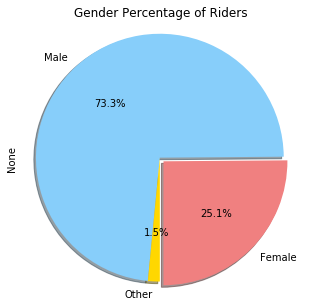

In [12]:
# insert pie graph of gender percentages
plt.title("Gender Percentage of Riders")
c_type=['Female','Male','Other']
# c_perc=[urb_fare_per,rur_fare_per,sub_fare_per]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.05, 0.0, 0) 
plot = m_grp_cnt.plot.pie(y='member_gender',figsize=(5,5),explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270,radius=1.2)
plt.axis("equal") 
plt.show()

In [13]:
# drop_frame.query(float('member_birth_year') > float('1989.0') and user_type == 'Subsciber').groupby('Sex').count()
#calc the number of customers and subscribers by gender

cus_df = clean_df.groupby(['user_type','member_gender']).size()
# cus_df.head(10)
cus_df


user_type   member_gender
Customer    Female             62858
            Male              131089
            Other               3969
Subscriber  Female            368967
            Male             1129462
            Other              22537
dtype: int64

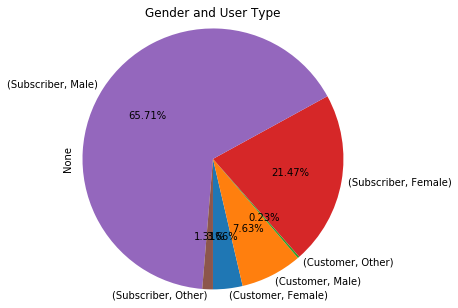

In [14]:
explode = (0.05, 0.0, .05,1.0,1.0,100.0)
plot = cus_df.plot.pie(y='member_gender',figsize=(5,5),autopct="%1.2f%%", shadow=False, labeldistance=1.05,startangle=270,radius=1.2)
plt.title("Gender and User Type")
# plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()

In [15]:
#bin the data by age groups
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 22, 31, 38, 45, 55, 66, 100]

# Create the names for the four bins
group_names = ["<21", "Early Millenial", "Late Millenial", "38-45", "46-55","56-65", ">65"]

In [16]:
# clean_df['age_grp'] = pd.cut(clean_df["age"], bins, labels=group_names)
# # age_df["age_bracket"]= pd.cut(clean_df["age"], bins, labels=group_names)
# #age_df= age_df.groupby([user_type])
# clean_df.head()
# clean_df.shape

clean_df['age_grp'] = pd.cut(clean_df["age"], bins, labels=group_names)
# age_df["age_bracket"]= pd.cut(clean_df["age"], bins, labels=group_names)
#age_df= age_df.groupby([user_type])
clean_df.head()
age_df= clean_df.groupby('age_grp', as_index=False)


In [ ]:
# clean_age_df=clean_df.groupby(['age_grp','user_type'])['age_grp'].count()
# clean_age_df
# clean_age_df=pd.DataFrame(clean_age_df, index=False)

In [17]:
# #number of users by the age grps and make them stackin

# #df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
# clean_age_df[['user-type','age_grp']].plot(kind='bar', stacked=True)
#plot = clean_age_df.plot.pie(y='age_grp',figsize=(5,5))
#plot=clean_age_df.plot.bar(['user-type'] stacked=True)
clean_age_df.plot(kind='bar',stacked=True) #works but lists it all out
#does not work pivot_df= clean_age_df.df.pitot(index= 'age_grp', columns = 'user_type', values='user_type' )

plt.show()


NameError: name 'clean_age_df' is not defined

In [ ]:
# plot = age_df.plot.pie(y='member_gender',figsize=(5,5))
# plt.show()

In [ ]:
# cus_age_df = clean_df.groupby(['user_type','member_gender','age']).size()
# # cus_df.head(10)
# cus_age_df

In [ ]:
# plot = cus_age_df.plot.pie(y='member_gender',figsize=(5,5))
# plt.show()
# #need to bin this

In [ ]:
# other_df= clean_df.loc[clean_df['member_gender']=='Other']
# other_df.head()
# # other_df.shape

In [ ]:
# other_df.shape

In [ ]:
# male_df= clean_df.loc[clean_df['member_gender']=='Male']
# male_df.head()
# male_df.shape

In [ ]:
# female_df= clean_df.loc[clean_df['member_gender']=='Female']
# female_df.head()
# female_df.shape

In [ ]:
# sub_df= clean_df.loc[clean_df['user_type']=='Subscriber']
# #sub_df.head()

In [ ]:
# sub_df.shape
# # sub_df.head()
# #subscibers only df is 1.520966M by 18

In [ ]:
# sub_df['member_gender'].unique()

In [ ]:
# m_sub_df= sub_df.loc[clean_df['member_gender']=='Male']
# m_sub_df.shape
# #1129462 by 18

In [ ]:
# f_sub_df= sub_df.loc[clean_df['member_gender']=='Female']
# f_sub_df.shape
# #368967 by 18

In [ ]:
# o_sub_df= sub_df.loc[clean_df['member_gender']=='Other']
# o_sub_df.shape
# #o_sub_df.head()

# #cnt is 22537 by 18

In [18]:
clean_df['age'].describe()


count    1.718882e+06
mean     3.546116e+01
std      9.556261e+00
min      1.900000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      6.400000e+01
Name: age, dtype: float64

In [ ]:
# low_df = clean_df[(clean_df['age']<20)]
# low_df.shape

In [ ]:
# o_low_df= low_df.loc[clean_df['member_gender']=='Other']
# o_low_df.shape

In [ ]:
# m_low_df= low_df.loc[clean_df['member_gender']=='Male']
# m_low_df.shape

In [ ]:
# f_low_df= low_df.loc[clean_df['member_gender']=='Female']
# f_low_df.shape

In [ ]:
# und23_df = clean_df[(clean_df['age']<23)]
# und23_df.shape

In [ ]:
# o_u23_df= und23_df.loc[clean_df['member_gender']=='Other']
# o_u23_df.shape

In [ ]:
# m_u23_df= und23_df.loc[clean_df['member_gender']=='Male']
# m_u23_df.shape

In [ ]:
# f_u23_df= und23_df.loc[clean_df['member_gender']=='Female']
# f_u23_df.shape

In [ ]:
# # grp all that are under age 37, the millenial? 23 to 37
# age_df= clean_df.loc[clean_df['age']>'23'and ['age']<'37' ]
# age_df.shape

# bins = [20, 25, 30, 35, 37, 40, 45]
# names = ['<20', '20-24','25-29', '30-35', '36 and 37','37-40', '40-44','>45' ]

#fig out millenials 23 to 37
# under23_df= sub_df.loc[clean_df['age'] <'23']
# under23_dfshape

# df[(df[col]>22) & (df[col]<38]

# early_mil_df = clean_df[(clean_df['age']>22) & (clean_df['age']<30)]
# early_mil_df.shape
# #mil_df.head()

In [ ]:
# o_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Other']
# o_early_mil_df.shape

In [ ]:
# m_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Male']
# m_early_mil_df.shape

In [ ]:
# f_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Female']
# f_early_mil_df.shape

In [ ]:
# late_mil_df = clean_df[(clean_df['age']>29) & (clean_df['age']<38)]
# late_mil_df.shape

In [ ]:
# o_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Other']
# o_late_mil_df.shape

In [ ]:
# m_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Male']
# m_late_mil_df.shape

In [ ]:
# f_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Female']
# f_late_mil_df.shape

In [ ]:
# to41_df= clean_df[(clean_df['age']>37) & (clean_df['age']<42)]
# to41_df.shape

In [ ]:
# o_to41_df= to41_df.loc[clean_df['member_gender']=='Other']
# o_to41_df.shape

In [ ]:
# m_to41_df= to41_df.loc[clean_df['member_gender']=='Male']
# m_to41_df.shape

In [ ]:
# f_to41_df= to41_df.loc[clean_df['member_gender']=='Female']
# f_to41_df.shape

In [ ]:
# ove41_df = clean_df[(clean_df['age']>65)]
# ove41_df.shape

In [ ]:
# o_ove41_df= ove41_df.loc[clean_df['member_gender']=='Other']
# o_ove41_df.shape

In [ ]:
# m_ove41_df= ove41_df.loc[clean_df['member_gender']=='Male']
# m_ove41_df.shape

In [ ]:
# f_ove41_df= ove41_df.loc[clean_df['member_gender']=='Female']
# f_ove41_df.shape

In [ ]:
# Find zipcodes using latitude and longitude coordinates

# Use sample coordinates and set "returns" to 1 to print out the result to determine the location of the zipcode value in the list
# The list returned by search.by_coordinates() does not allow strings to be used to select values due to SimpleZipcode()
# coordinates_sample = search.by_coordinates(39.122229, -77.133578, radius=5, returns=1)
#print(coordinates_sample)

In [ ]:
clean_small= clean_df.head(500)
clean_small.shape

In [ ]:
# Create an empty list to append the coordinate values to
coordinates_list = []

# Zip the columns "start_station_latitude" and "start_station_longitude" to return an iterator of tuples
# Loop through each value in the columns using lat, lng
for lat, lng  in zip(clean_small['start_station_latitude'], clean_small['start_station_longitude']):
    #print(lat, lng)
    # Find the lng, lat paired coordinates using search.by_coordinates() from the uszipcode dependency
    # Set returns to 0 to return all of the coordinates in the lat,lng columns
    # Set the radius to 100 to make sure to cover all of the zipcodes included in our database
    coordinates = search.by_coordinates(lat=lat, lng=lng, radius=100, returns=0)
    # Append the lat,lng coordinates to coordinates_list
    coordinates_list.append(coordinates)

In [ ]:
# Use a list comprehension to unpack the rest of the values in "result" so you can choose the zipcodes to add to the dataframe
#old code zipcode = [coordinates_list[i][0].items()[0][1] for i, x in enumerate(coordinates_list)]
zipcode = [coordinates_list[i][0].items()[0][1] for i, x in enumerate(coordinates_list)]
# Assign the zipcode values to the zip_code column in the dataframe
clean_small['zip_code'] = zipcode
# Preview the first 5 rows of the updated dataframe to confirm that the changes were made properly
clean_small.head()

In [ ]:
# Calculate number of stations in each zip code

# Create a new dataframe with the columns zip_code, start_station_id, and end_station_id. This will be used to calculate the
# number of stations in each zip code
station_count_df = clean_small[['zip_code', 'start_station_id', 'end_station_id']]
# Display the first few rows to confirm that the dataframe was created properly
station_count_df.head()

In [ ]:
# Set a variable, unique_count, to a groupby() object as a base for calculating the number of stations in each zip code
# Pass the zip_code column into groupby to count the number of stations grouped by each unique zip code
# Use .size() to return the total number of elements
# Use .reset_index() to recalculate the index for each row based upon their position within the new DataFrame. This will
 # enable simpler referencing of rows in the future
# Pass the name argument in .reset_index() to assign a name to the column that will hold the values for the number of stations
 # in each zip code
unique_count = station_count_df.groupby('zip_code').size().reset_index(name='num_stations_by_zip')
# Display the dataframe to make sure it was created properly
unique_count

In [ ]:
# Calculate the length of the station_count_df dataframe and the sum of the values in the num_stations_by_zip to make sure they
# match
print(len(station_count_df))
print(unique_count['num_stations_by_zip'].sum())

In [ ]:
#change starttime column to pandas datetime
clean_df['start_time']=pd.to_datetime(clean_df['start_time'])
#add a column for Month
clean_df['month'] = clean_df['start_time'].dt.month
#use groupby to find the number of rides per month
total_rides_month = clean_df.groupby('month').start_time.count()
total_rides_month

In [ ]:
# subset the clean_df for female, male and other
female_df=clean_df.loc[clean_df['member_gender'] == 'Female']
male_df=clean_df.loc[clean_df['member_gender'] == 'Male']
other_df=clean_df.loc[clean_df['member_gender'] == 'Other']
# find the total numbers of rides  per month for each gender group
total_rides_fmonth = female_df.groupby('month').start_time.count()
total_rides_mmonth = male_df.groupby('month').start_time.count()
total_rides_omonth = other_df.groupby('month').start_time.count()

In [ ]:
#plot the graph for "RIDES TAKEN PER MONTH"
plt.plot(total_rides_month,'b', label = "All Rides")
plt.plot(total_rides_fmonth,'r', label = "Rides by Females")
plt.plot(total_rides_mmonth,'g', label = "Rides by Males")
plt.plot(total_rides_omonth,'y', label = "Rides by Other")
plt.legend()
plt.title('RIDES TAKEN PER MONTH')
plt.xlabel("Month of the Year")
plt.ylabel("Number of Rides")
plt.show()